In [1]:
import utils.notebooks as nb
from utils.loader import DicomDataset3D
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
from models.unet3d.model import UNet3D

BATCH_SIZE = 1
EPOCHS = 14
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = UNet3D(1, 1, f_maps=8, num_levels=4).to(device)

train_dataloader = DataLoader(DicomDataset3D("data/train.csv"), batch_size=BATCH_SIZE)
test_dataloader = DataLoader(DicomDataset3D("data/test.csv"), batch_size=BATCH_SIZE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [2]:
pos_weight = torch.tensor([100]).to(device)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight).to(device)
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

2023-04-21 09:57:39.655059: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 09:57:40.983982: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-21 09:57:40.984057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-21 09:57:40.984063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
for epoch in range(EPOCHS):
    for data in iter(train_dataloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # print(f'max label: {torch.max(labels)}')
        optimizer.zero_grad()

        output = model(inputs)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()
    writer.add_scalar("Loss/train", loss, epoch)
    print(loss)

tensor(0.5680, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6445, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.5108, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4136, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2818, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2393, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2821, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3048, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3495, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2372, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2913, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [ ]:
writer.flush()
torch.save(model.state_dict(), './state_dicts/regular_unet.pt')
# model.load_state_dict(torch.load('MODEL.pk'))

torch.Size([1, 1, 72, 256, 256])
torch.Size([1, 1, 72, 256, 256])


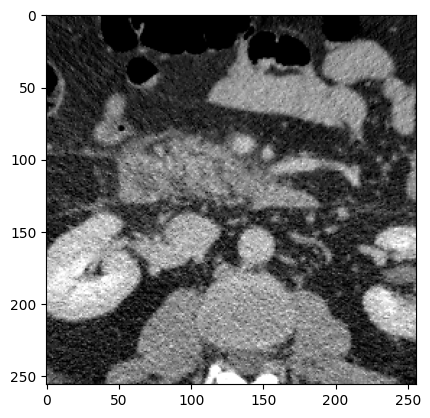

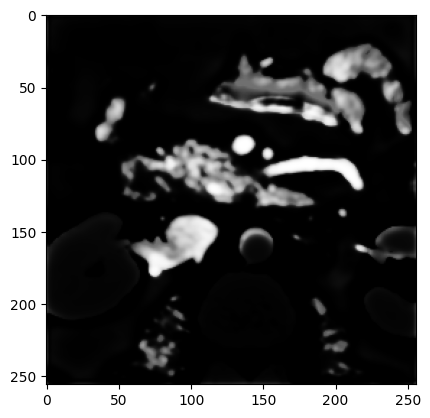

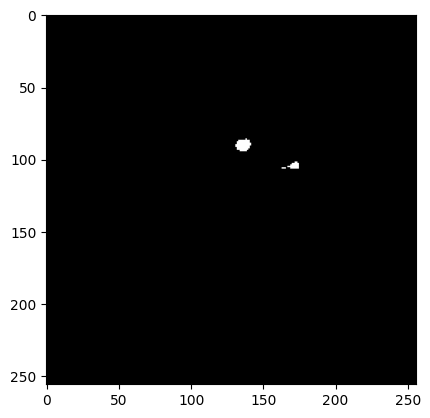

tensor(2.5933e-12, device='cuda:0')
tensor(0.9964, device='cuda:0')


In [ ]:
with torch.no_grad():
    x, y = next(iter(test_dataloader))
    print(x.shape)
    if torch.cuda.is_available():
        x, y = x.cuda(), y.cuda()
    pred = model(x)
    pred = torch.nn.Sigmoid()(pred)
    print(pred.shape)
    nb.show(x[0], 45)
    nb.show(pred[0], 45)
    nb.show(y[0], 45)
    print(torch.min(pred))
    print(torch.max(pred))